Classification using Deep neural network (Any One from the following)

1. Binary classification using Deep Neural Networks Example: Classify movie reviews into positive” reviews and “negative” reviews, just based on the text content of the reviews. Use IMDB dataset.

In [6]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers
import matplotlib.pyplot as plt

In [7]:
#loading imdb data with most frequent 10000 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [9]:
#vectorization function
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
#vectorizing data
X_train = vectorize(X_train)
X_test = vectorize(X_test)

In [11]:
#coverting labels to float32

y_train = np.array(y_train).astype("float32")
y_test = np.array(y_test).astype("float32")

In [12]:
#Building Model

model = models.Sequential()
model.add(layers.Dense(50, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#compiling model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
#Training Model

results = model.fit(X_train, y_train, epochs=2, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.6971 - loss: 0.5740 - val_accuracy: 0.8813 - val_loss: 0.2959
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9102 - loss: 0.2353 - val_accuracy: 0.8867 - val_loss: 0.2858


In [15]:
#Evaluating Model

score = model.evaluate(X_test, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8856 - loss: 0.2874
Test Loss: 0.28584998846054077
Test Accuracy: 0.886680006980896


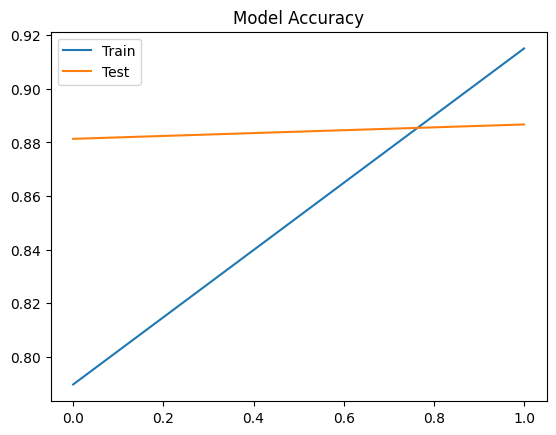

In [16]:
#plotting accuracy

plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

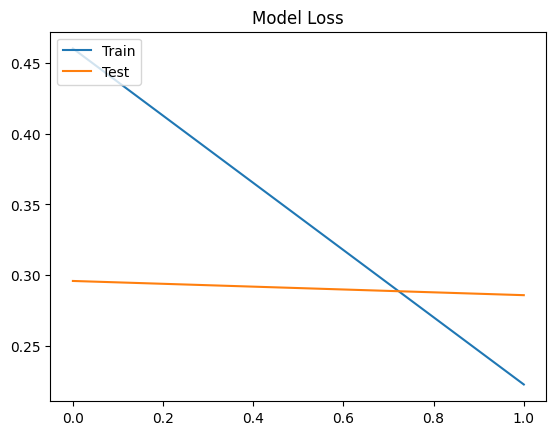

In [17]:
#plotting loss

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.09180158],
       [0.9997069 ],
       [0.9646363 ],
       ...,
       [0.06787974],
       [0.05790954],
       [0.43374956]], dtype=float32)